# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from newsapi import NewsApiClient
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Owner\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# Read your api key environment variable
load_dotenv()
api_key = os.getenv("NEWS_API_KEY")

In [3]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [4]:
# Fetch the Bitcoin news articles
btc_articles = newsapi.get_everything(
    q="bitcoin",
    language="en",
    page_size=100, 
    sort_by="relevancy"
)

btc_articles

{'status': 'ok',
 'totalResults': 10187,
 'articles': [{'source': {'id': 'wired', 'name': 'Wired'},
   'author': 'Arielle Pardes',
   'title': 'Miami’s Bitcoin Conference Left a Trail of Harassment',
   'description': 'For some women, inappropriate conduct from other conference-goers continued to haunt them online.',
   'url': 'https://www.wired.com/story/bitcoin-2022-conference-harassment/',
   'urlToImage': 'https://media.wired.com/photos/627a89e3e37e715cb7d760d2/191:100/w_1280,c_limit/Bitcoin_Miami_Biz_GettyImages-1239817123.jpg',
   'publishedAt': '2022-05-10T16:59:46Z',
   'content': 'Now, even though there are a number of women-focused crypto spaces, Odeniran says women are still underrepresented. Ive been in spaces where Im the only Black person, or the only woman, or the only B… [+3828 chars]'},
  {'source': {'id': 'the-verge', 'name': 'The Verge'},
   'author': 'Justine Calma',
   'title': 'Why fossil fuel companies see green in Bitcoin mining projects',
   'description': 'Exx

In [5]:
# Fetch the Ethereum news articles
eth_articles = newsapi.get_everything(
    q="ethereum",
    language="en",
    page_size=100, 
    sort_by="relevancy"
)

eth_articles

{'status': 'ok',
 'totalResults': 4882,
 'articles': [{'source': {'id': 'engadget', 'name': 'Engadget'},
   'author': 'Jon Fingas',
   'title': "Here's what NFTs look like on Instagram",
   'description': "Meta has revealed more of how NFTs will work on Instagram. In the US-based test, you can show what you've bought or created for free by connecting your Instagram account to a compatible digital wallet and posting for the world to see. If you like, the social …",
   'url': 'https://www.engadget.com/instagram-nft-details-131020868.html',
   'urlToImage': 'https://s.yimg.com/os/creatr-uploaded-images/2022-05/2546c160-d05e-11ec-b75e-e45eaa8c5b2b',
   'publishedAt': '2022-05-10T13:10:20Z',
   'content': "Meta has revealed more of how NFTs will work on Instagram. In the US-based test, you can show what you've bought or created for free by connecting your Instagram account to a compatible digital walle… [+1223 chars]"},
  {'source': {'id': None, 'name': 'The Guardian'},
   'author': 'Alex H

In [6]:
# Create the Bitcoin sentiment scores DataFrame
btc_sentiments = []

for article in btc_articles["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        btc_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
# Create DataFrame
btc_ss_df = pd.DataFrame(btc_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
btc_ss_df = btc_ss_df[cols]

btc_ss_df.head()

,date,text,compound,positive,negative,neutral
0,2022-05-10,"Now, even though there are a number of women-f...",0.0772,0.036,0.000,0.964
1,2022-05-04,A Bitcoin mining site powered by otherwise los...,-0.0516,0.056,0.061,0.882
2,2022-05-02,Warren Buffett has always been a bitcoin skept...,-0.3269,0.085,0.143,0.772
3,2022-05-16,"As a kid, I remember when my father tried to u...",0.3818,0.114,0.052,0.833
4,2022-05-09,"Image source, Getty Images\r\nThe value of Bit...",0.3400,0.072,0.000,0.928


In [7]:
# Create the Ethereum sentiment scores DataFrame
eth_sentiments = []

for article in eth_articles["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        eth_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
# Create DataFrame
eth_ss_df = pd.DataFrame(eth_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
eth_ss_df = eth_ss_df[cols]

eth_ss_df.head()

,date,text,compound,positive,negative,neutral
0,2022-05-10,Meta has revealed more of how NFTs will work o...,0.6486,0.135,0.000,0.865
1,2022-05-02,A multi-billion dollar cryptocurrency company ...,-0.2263,0.046,0.075,0.879
2,2022-05-04,When Bored Ape Yacht Club creators Yuga Labs a...,-0.2732,0.000,0.055,0.945
3,2022-04-26,April 26 (Reuters) - Ether has promised to do ...,0.5346,0.142,0.000,0.858
4,2022-04-26,Ethereum is preparing for an upgrade thats bee...,0.2716,0.065,0.000,0.935


In [8]:
# Describe the Bitcoin Sentiment
btc_ss_df.describe()

,compound,positive,negative,neutral
count,100.000000,100.000000,100.000000,100.000000
mean,-0.032648,0.052250,0.060010,0.887750
std,0.429843,0.065469,0.074539,0.091787
min,-0.831600,0.000000,0.000000,0.557000
25%,-0.381800,0.000000,0.000000,0.839500
50%,0.000000,0.018000,0.046500,0.897500
75%,0.323650,0.081250,0.094750,0.951250
max,0.865500,0.263000,0.299000,1.000000


In [9]:
# Describe the Ethereum Sentiment
eth_ss_df.describe()

,compound,positive,negative,neutral
count,100.000000,100.000000,100.000000,100.000000
mean,0.087897,0.078360,0.048440,0.873250
std,0.477614,0.089021,0.060292,0.090506
min,-0.836000,0.000000,0.000000,0.622000
25%,-0.284450,0.000000,0.000000,0.825000
50%,0.000000,0.062000,0.037000,0.881500
75%,0.437950,0.127250,0.075000,0.935500
max,0.952000,0.378000,0.299000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Ethereum had the highest mean positive score of 0.078360, compared to Bitcoin's 0.052250. 

Q: Which coin had the highest compound score?

A: Ethereum had the highest compound score of 0.952000, compared to Bitcoin's 0.865500. Further, Ethereum and Bitcoin both had identical maximum negative scores of 0.299000. 

Q. Which coin had the highest positive score?

A: Ethereum had the highest positive score of 0.378000, compared to Bitcoin's 0.263000.

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [10]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re
import nltk
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Owner\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Owner\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Owner\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [11]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
sw = set(stopwords.words('english'))
print(stopwords.words('english'))

# Expand the default stopwords list if necessary

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [12]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Remove the punctuation from text 
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text) 
    
    # Create a tokenized list of the words (creating object out of text)
    re_words = word_tokenize(re_clean)
    
    
    # Lemmatize words into root words
    result = [lemmatizer.lemmatize(word) for word in re_words]
   
    # Convert the words to lowercase
    tokens = [word.lower() for word in re_words if word.lower() not in sw]
    
    # Remove the stop words
    # Performed above 
    
    return tokens

In [13]:
# Create a new tokens column for Bitcoin 
btc_ss_df['tokens']= btc_ss_df.text.apply(tokenizer)
btc_ss_df

,date,text,compound,positive,negative,neutral,tokens
0,2022-05-10,"Now, even though there are a number of women-f...",0.0772,0.036,0.000,0.964,"[even, though, number, womenfocused, crypto, s..."
1,2022-05-04,A Bitcoin mining site powered by otherwise los...,-0.0516,0.056,0.061,0.882,"[bitcoin, mining, site, powered, otherwise, lo..."
2,2022-05-02,Warren Buffett has always been a bitcoin skept...,-0.3269,0.085,0.143,0.772,"[warren, buffett, always, bitcoin, skeptic, bi..."
3,2022-05-16,"As a kid, I remember when my father tried to u...",0.3818,0.114,0.052,0.833,"[kid, remember, father, tried, use, broom, han..."
4,2022-05-09,"Image source, Getty Images\r\nThe value of Bit...",0.3400,0.072,0.000,0.928,"[image, source, getty, imagesthe, value, bitco..."
...,...,...,...,...,...,...,...
95,2022-05-02,Warren Buffett and Charlie Munger revealed the...,-0.6486,0.000,0.159,0.841,"[warren, buffett, charlie, munger, revealed, b..."
96,2022-04-26,Whats happening in the blockchain industry thi...,0.0000,0.000,0.000,1.000,"[whats, happening, blockchain, industry, year,..."
97,2022-04-26,Whats happening in the blockchain industry thi...,0.0000,0.000,0.000,1.000,"[whats, happening, blockchain, industry, year,..."
98,2022-05-13,A look at the day ahead in markets from Dhara ...,0.6249,0.124,0.000,0.876,"[look, day, ahead, markets, dhara, ranasinghea..."


In [14]:
# Create a new tokens column for Ethereum
eth_ss_df['tokens']= eth_ss_df.text.apply(tokenizer)
eth_ss_df

,date,text,compound,positive,negative,neutral,tokens
0,2022-05-10,Meta has revealed more of how NFTs will work o...,0.6486,0.135,0.000,0.865,"[meta, revealed, nfts, work, instagram, usbase..."
1,2022-05-02,A multi-billion dollar cryptocurrency company ...,-0.2263,0.046,0.075,0.879,"[multibillion, dollar, cryptocurrency, company..."
2,2022-05-04,When Bored Ape Yacht Club creators Yuga Labs a...,-0.2732,0.000,0.055,0.945,"[bored, ape, yacht, club, creators, yuga, labs..."
3,2022-04-26,April 26 (Reuters) - Ether has promised to do ...,0.5346,0.142,0.000,0.858,"[april, reuters, ether, promised, better, prom..."
4,2022-04-26,Ethereum is preparing for an upgrade thats bee...,0.2716,0.065,0.000,0.935,"[ethereum, preparing, upgrade, thats, describe..."
...,...,...,...,...,...,...,...
95,2022-05-17,With the crypto market down a jaw-dropping 41%...,-0.2144,0.000,0.050,0.950,"[crypto, market, jawdropping, trillion, year, ..."
96,2022-04-25,Bloomberg's Levine: Can you give me an intuiti...,0.3612,0.101,0.000,0.899,"[bloombergs, levine, give, intuitive, understa..."
97,2022-05-18,Bottom line: The basic Coinbase account best s...,0.8271,0.231,0.000,0.769,"[bottom, linethe, basic, coinbase, account, be..."
98,2022-05-16,What was once a niche investment is now becomi...,0.0000,0.000,0.000,1.000,"[niche, investment, becoming, mainstream, vast..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [15]:
from collections import Counter
from nltk import ngrams

In [16]:
# Create variable for Bitcoin tokens column 
btc_tokens = btc_ss_df['tokens']

# Combine tokens from list of lists into one large list 
btc_tokens_list = []
for sublist in btc_tokens:
    for item in sublist:
        btc_tokens_list.append(item)
        
# Display btc_tokens_list
btc_tokens_list

['even',
 'though',
 'number',
 'womenfocused',
 'crypto',
 'spaces',
 'odeniran',
 'says',
 'women',
 'still',
 'underrepresented',
 'ive',
 'spaces',
 'im',
 'black',
 'person',
 'woman',
 'b',
 'chars',
 'bitcoin',
 'mining',
 'site',
 'powered',
 'otherwise',
 'lost',
 'gas',
 'oil',
 'well',
 'near',
 'linden',
 'texas',
 'april',
 'th',
 'photo',
 'francois',
 'picardafp',
 'via',
 'getty',
 'images',
 'corporate',
 'climate',
 'hype',
 'fl',
 'chars',
 'warren',
 'buffett',
 'always',
 'bitcoin',
 'skeptic',
 'billionaire',
 'investor',
 'harsh',
 'words',
 'yet',
 'cryptocurrency',
 'weekend',
 'buffett',
 'made',
 'clear',
 'opposition',
 'crypt',
 'chars',
 'kid',
 'remember',
 'father',
 'tried',
 'use',
 'broom',
 'handle',
 'last',
 'ditch',
 'effort',
 'support',
 'roof',
 'collapsing',
 'weight',
 'nearly',
 'three',
 'feet',
 'snow',
 'guess',
 'well',
 'chars',
 'image',
 'source',
 'getty',
 'imagesthe',
 'value',
 'bitcoin',
 'continued',
 'fall',
 'weekend',
 'dropp

In [17]:
# Generate the Bitcoin N-grams where N=2
btc_bigram = Counter(ngrams(btc_tokens_list, n=2))
print(dict(btc_bigram))

{('even', 'though'): 2, ('though', 'number'): 1, ('number', 'womenfocused'): 1, ('womenfocused', 'crypto'): 1, ('crypto', 'spaces'): 1, ('spaces', 'odeniran'): 1, ('odeniran', 'says'): 1, ('says', 'women'): 1, ('women', 'still'): 1, ('still', 'underrepresented'): 1, ('underrepresented', 'ive'): 1, ('ive', 'spaces'): 1, ('spaces', 'im'): 1, ('im', 'black'): 1, ('black', 'person'): 1, ('person', 'woman'): 1, ('woman', 'b'): 1, ('b', 'chars'): 3, ('chars', 'bitcoin'): 3, ('bitcoin', 'mining'): 3, ('mining', 'site'): 1, ('site', 'powered'): 1, ('powered', 'otherwise'): 1, ('otherwise', 'lost'): 1, ('lost', 'gas'): 1, ('gas', 'oil'): 1, ('oil', 'well'): 1, ('well', 'near'): 1, ('near', 'linden'): 1, ('linden', 'texas'): 1, ('texas', 'april'): 1, ('april', 'th'): 1, ('th', 'photo'): 1, ('photo', 'francois'): 1, ('francois', 'picardafp'): 1, ('picardafp', 'via'): 1, ('via', 'getty'): 1, ('getty', 'images'): 1, ('images', 'corporate'): 1, ('corporate', 'climate'): 1, ('climate', 'hype'): 1, ('

In [18]:
# Create variable for Ethereum tokens column 
eth_tokens = eth_ss_df['tokens']

# Combine token from list of lists into one large list 
eth_tokens_list = []
for sublist in eth_tokens:
    for item in sublist:
        eth_tokens_list.append(item)
        
# Display btc_tokens_list
eth_tokens_list

['meta',
 'revealed',
 'nfts',
 'work',
 'instagram',
 'usbased',
 'test',
 'show',
 'youve',
 'bought',
 'created',
 'free',
 'connecting',
 'instagram',
 'account',
 'compatible',
 'digital',
 'walle',
 'chars',
 'multibillion',
 'dollar',
 'cryptocurrency',
 'company',
 'apologised',
 'users',
 'sale',
 'metaverse',
 'land',
 'sparked',
 'frenzy',
 'temporarily',
 'brought',
 'ethereum',
 'cryptocurrencyyuga',
 'labs',
 'comp',
 'chars',
 'bored',
 'ape',
 'yacht',
 'club',
 'creators',
 'yuga',
 'labs',
 'announced',
 'otherside',
 'nft',
 'collection',
 'would',
 'launch',
 'april',
 'predicted',
 'many',
 'biggest',
 'nft',
 'launch',
 'ever',
 'otherside',
 'upcoming',
 'bore',
 'chars',
 'april',
 'reuters',
 'ether',
 'promised',
 'better',
 'promised',
 'go',
 'next',
 'level',
 'edging',
 'crypto',
 'rivals',
 'even',
 'outshining',
 'godfather',
 'bitcoin',
 'clocks',
 'tickingthe',
 'chars',
 'ethereum',
 'preparing',
 'upgrade',
 'thats',
 'described',
 'single',
 'import

In [19]:
# Generate the Ethereum N-grams where N=2
eth_bigram = Counter(ngrams(eth_tokens_list, n=2))
print(dict(eth_bigram))

{('meta', 'revealed'): 1, ('revealed', 'nfts'): 1, ('nfts', 'work'): 1, ('work', 'instagram'): 1, ('instagram', 'usbased'): 1, ('usbased', 'test'): 1, ('test', 'show'): 1, ('show', 'youve'): 1, ('youve', 'bought'): 1, ('bought', 'created'): 1, ('created', 'free'): 1, ('free', 'connecting'): 1, ('connecting', 'instagram'): 1, ('instagram', 'account'): 1, ('account', 'compatible'): 1, ('compatible', 'digital'): 1, ('digital', 'walle'): 1, ('walle', 'chars'): 1, ('chars', 'multibillion'): 1, ('multibillion', 'dollar'): 1, ('dollar', 'cryptocurrency'): 1, ('cryptocurrency', 'company'): 1, ('company', 'apologised'): 1, ('apologised', 'users'): 1, ('users', 'sale'): 1, ('sale', 'metaverse'): 1, ('metaverse', 'land'): 1, ('land', 'sparked'): 1, ('sparked', 'frenzy'): 1, ('frenzy', 'temporarily'): 1, ('temporarily', 'brought'): 1, ('brought', 'ethereum'): 1, ('ethereum', 'cryptocurrencyyuga'): 1, ('cryptocurrencyyuga', 'labs'): 1, ('labs', 'comp'): 1, ('comp', 'chars'): 1, ('chars', 'bored'): 

In [20]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [21]:
# Use token_count to get the top 10 words for Bitcoin
btc_top_10= token_count(btc_tokens_list, N=10)
btc_top_10= pd.DataFrame (btc_top_10, columns = ['word', 'count'])
btc_top_10.style

,word,count
0,chars,91
1,bitcoin,54
2,reuters,34
3,may,33
4,cryptocurrency,32
5,crypto,21
6,cryptocurrencies,20
7,worlds,13
8,april,12
9,new,11


In [22]:
# Use token_count to get the top 10 words for Ethereum
eth_top_10= token_count(eth_tokens_list, N=10)
eth_top_10= pd.DataFrame (eth_top_10, columns = ['word', 'count'])
eth_top_10.style

,word,count
0,chars,100
1,cryptocurrency,27
2,crypto,26
3,bitcoin,22
4,cryptocurrencies,15
5,last,14
6,may,13
7,ethereum,12
8,nfts,10
9,digital,10


---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [23]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

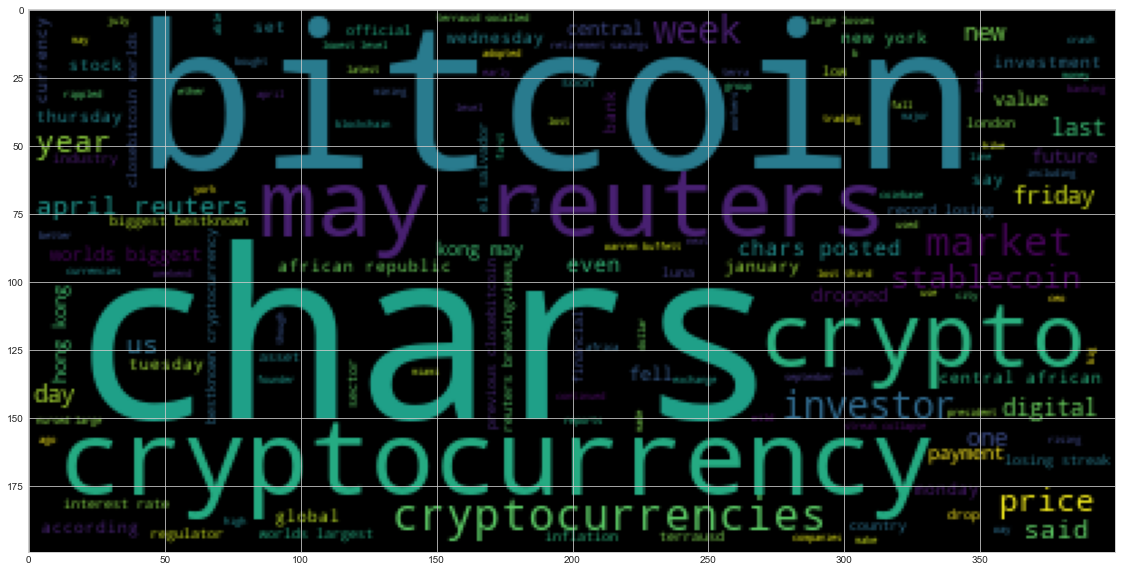

In [24]:
# Generate the Bitcoin word cloud
big_string_btc = ' '.join(btc_tokens_list)
input_text_btc = big_string_btc
wc_btc = WordCloud().generate(input_text_btc)
plt.imshow(wc_btc)

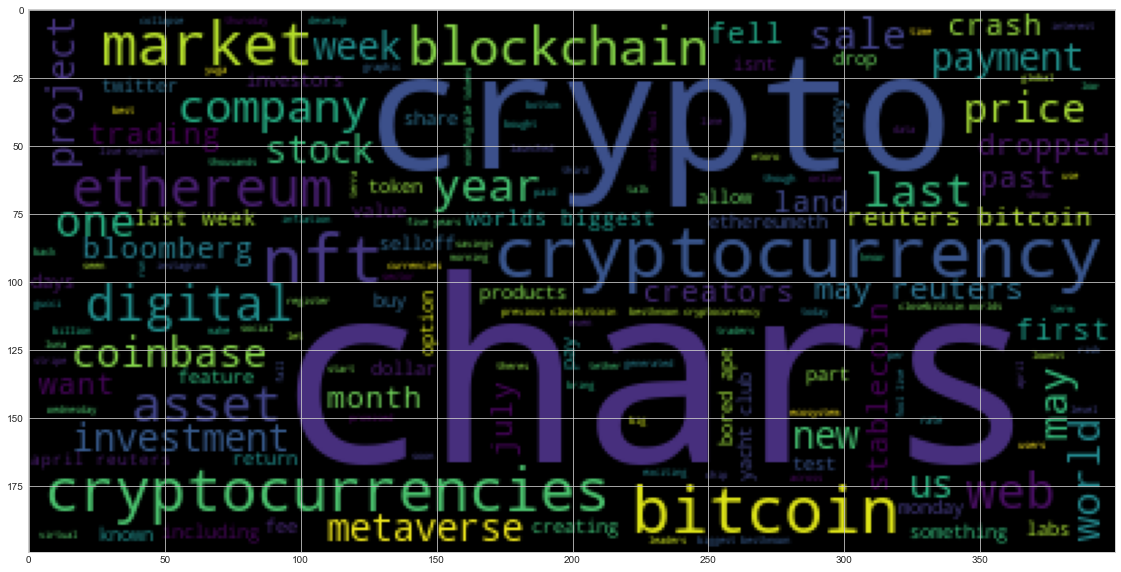

In [25]:
# Generate the Ethereum word cloud
big_string_eth = ' '.join(eth_tokens_list)
input_text_eth = big_string_eth
wc_eth = WordCloud().generate(input_text_eth)
plt.imshow(wc_eth)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [26]:
import spacy
from spacy import displacy

In [27]:
# Download the language model for SpaCy
!python -m spacy download en_core_web_sm

[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [28]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [29]:
# Concatenate all of the Bitcoin text together
btc_text = btc_ss_df['text'].str.cat()
btc_text

'Now, even though there are a number of women-focused crypto spaces, Odeniran says women are still underrepresented. Ive been in spaces where Im the only Black person, or the only woman, or the only B… [+3828 chars]A Bitcoin mining site powered by otherwise lost gas from an oil well near Linden, Texas, on April 4th, 2022. | Photo by FRANCOIS PICARD/AFP via Getty Images\r\n\n \n\n Of all the corporate climate hype fl… [+6544 chars]Warren Buffett has always been a bitcoin skeptic. But the billionaire investor had his most harsh words yet for the cryptocurrency over the weekend. Buffett made it clear that his opposition to crypt… [+2297 chars]As a kid, I remember when my father tried to use a broom handle in a last ditch effort to support a roof that was collapsing from the weight of nearly three feet of snow. You can guess how well that … [+3390 chars]Image source, Getty Images\r\nThe value of Bitcoin continued to fall over the weekend as it dropped below $34,000 (£27,630), according to 

In [30]:
# Run the NER processor on all of the text
nlp(btc_text)

# Add a title to the document
btc_doc=nlp(btc_text)

In [31]:
# Render the visualization
displacy.render(btc_doc, style='ent') 

In [32]:
# List all Entities
for ent in btc_doc.ents:
    print(ent.text, ent.label_)

Odeniran GPE
Linden GPE
Texas GPE
April 4th, 2022 DATE
Photo PERSON
FRANCOIS PICARD/AFP ORG
Getty Images ORG
Buffett PERSON
the weekend DATE
nearly three feet QUANTITY
Getty Images
 ORG
the weekend DATE
34,000 MONEY
27,630 MONEY
Coinbase PERSON
Last week DATE
Fidelity Investments ORG
the US Treasury ORG
11 CARDINAL
Reuters ORG
7.23% PERCENT
28,758.29 MONEY
GMT WORK_OF_ART
Wednesday DATE
2,241.68 MONEY
40.4% PERCENT
+361 chars]May 4 ORG
Reuters ORG
5.7% PERCENT
39,862.84 MONEY
Wednesday DATE
2,102.94 MONEY
20.9% PERCENT
year DATE
Reuters ORG
5.1% PERCENT
38,391.36 MONEY
Tuesday DATE
2,229.82 MONEY
16% PERCENT
year DATE
Bitcoin ORG
Gucci handbag PERSON
week DATE
Kristy Kilburn PERSON
last July DATE
33,000 MONEY
the week DATE
last week DATE
Fed ORG
9 CARDINAL
Reuters ORG
7.81% PERCENT
31,333.41 MONEY
GMT WORK_OF_ART
Monday DATE
2,655.98 MONEY
35% PERCENT
AMC ORG
April 15 DATE
AMC ORG
Adam Aron PERSON
Mexican NORP
North London LOC
a few weeks ago DATE
+2779 chars]May ORG
10 CARDINAL
Reuter

---

### Ethereum NER

In [33]:
# Concatenate all of the Ethereum text together
eth_text = eth_ss_df['text'].str.cat()
eth_text

'Meta has revealed more of how NFTs will work on Instagram. In the US-based test, you can show what you\'ve bought or created for free by connecting your Instagram account to a compatible digital walle… [+1223 chars]A multi-billion dollar cryptocurrency company has apologised to users after its sale of metaverse land sparked a frenzy that temporarily brought down the Ethereum cryptocurrency.\r\nYuga Labs, the comp… [+3475 chars]When Bored Ape Yacht Club creators Yuga Labs announced its Otherside NFT collection would launch on April 30, it was predicted by many to be the biggest NFT launch ever. Otherside is an upcoming Bore… [+6669 chars]April 26 (Reuters) - Ether has promised to do better. It has promised to go to the next level, edging out crypto rivals and even outshining the godfather, bitcoin. But the clock\'s ticking.\r\nThe No.2 … [+4092 chars]Ethereum is preparing for an upgrade thats been described as the single most important event in crypto history.\r\nThe transition would o

In [34]:
# Run the NER processor on all of the text
nlp(eth_text)

# Add a title to the document
eth_doc=nlp(eth_text)

In [35]:
# Render the visualization
displacy.render(eth_doc, style='ent') 

In [36]:
# List all Entities
for ent in eth_doc.ents:
    print(ent.text, ent.label_)

Meta ORG
Instagram ORG
US GPE
Instagram ORG
Ethereum ORG
Yuga Labs PERSON
Yacht Club ORG
Yuga Labs PERSON
Otherside NFT LAW
April 30 DATE
NFT ORG
chars]April 26 DATE
Reuters ORG
No.2 CARDINAL
second ORDINAL
AMC ORG
April 15 DATE
AMC ORG
Adam Aron PERSON
Last night TIME
Bloomberg GPE
nearly a third CARDINAL
a billion dollars MONEY
IndependenceWe NORP
chars]40 days ago DATE
47,454 MONEY
34,007 MONEY
28%.About a third CARDINAL
this week DATE
Nvidia PERSON
Ampere Lite Hash Rate WORK_OF_ART
LHR ORG
Ethereum ORG
4 CARDINAL
Reuters ORG
5.7% PERCENT
39,862.84 MONEY
Wednesday DATE
2,102.94 MONEY
20.9% PERCENT
year DATE
Reuters ORG
5.1% PERCENT
38,391.36 MONEY
Tuesday DATE
2,229.82 MONEY
16% PERCENT
year DATE
+339 chars]May 11 ORG
Reuters ORG
7.23% PERCENT
28,758.29 MONEY
GMT WORK_OF_ART
Wednesday DATE
2,241.68 MONEY
40.4% PERCENT
+361 chars]May 9 ORG
Reuters ORG
7.81% PERCENT
31,333.41 MONEY
GMT WORK_OF_ART
Monday DATE
2,655.98 MONEY
35% PERCENT
NFT ORG
Ethereum ORG
Last week DATE
8 CARDINAL
Nv

---